In [1]:
import pandas as pd
import seaborn as sb
# import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#libraries used to extract, clean and manipulate the data
from helpers import *
import pandas as pd
import numpy as np
import string

#To plot the graphs
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#library used to count the frequency of words
from sklearn.feature_extraction.text import CountVectorizer

#To create the sentiment analysis model, tokenization and lemmatization
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk.data
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Deligram\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Deligram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Using friedman's super smoother from 1984
from supersmoother import SuperSmoother, LinearSmoother

In [4]:
#Read csv file by pandas
#tx_data = pd.read_csv('clean_dataset_all_2.csv', encoding = 'unicode_escape')

In [5]:
tx_data = pd.read_pickle('clean_dataset_all_2.pkl')

In [6]:
#df_inner = pd.merge(tx_data, tx_original[['SongID','Lyrics']], on='SongID', how='left')

In [7]:
df = tx_data

In [8]:
df

,Unnamed: 0,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,...,Lyrics,Artist,common,words,wordCount,languages,all_words,allWordCount,without_negations,only_negations
0,0,http://www.billboard.com/charts/hot-100/1963-0...,6/1/1963,11,Still,bill anderson,StillBill Anderson,1.0,17.0,11.0,...,still\nthough you broke my heart\nstill\nthoug...,bill anderson,"[bill, anderson]","[still, though, broke, heart, be, far, apart, ...",64,en,"[still, though, broke, heart, still, though, b...",102,"[still, though, broke, heart, still, though, b...","[one, mar, know, even, know, able, put, one, l..."
1,1,http://www.billboard.com/charts/hot-100/1967-0...,1/7/1967,11,Coming Home Soldier,bobby vinton,Coming Home SoldierBobby Vinton,1.0,17.0,11.0,...,i'm coming home i'm coming\ni'm coming home i'...,bobby vinton,"[bobby, vinton]","[im, come, home, across, sea, march, fight, so...",28,en,"[im, come, home, im, come, im, come, home, im,...",93,"[im, come, home, im, come, im, come, home, im,...","[march, fight, purple, heart, mind, purple, he..."
2,3,http://www.billboard.com/charts/hot-100/1975-1...,11/29/1975,11,Saturday Night,bay city rollers,Saturday NightBay City Rollers,1.0,17.0,11.0,...,saturday night\nsaturday night\nsaturday night...,bay city rollers,"[bay, city, rollers]","[saturday, night, gonna, keep, dance, rock, ro...",34,en,"[saturday, night, saturday, night, saturday, n...",145,"[saturday, night, saturday, night, saturday, n...",[wait]
3,5,http://www.billboard.com/charts/hot-100/1987-0...,9/19/1987,11,Carrie,europe,CarrieEurope,1.0,17.0,11.0,...,joey tempest\nwhen lights go down\ni see no re...,europe,[europe],"[joey, tempest, light, go, see, reason, cry, w...",47,en,"[joey, tempest, light, go, see, reason, cry, w...",117,"[joey, tempest, light, go, down, see, cry, wev...","[reason, ask, see, eye, intention, pain, see, ..."
4,6,http://www.billboard.com/charts/hot-100/1987-1...,10/3/1987,11,Casanova,levert,CasanovaLevert,1.0,17.0,11.0,...,hook\ni ain't much on casanova\nme and romeo a...,levert,[levert],"[hook, aint, much, casanova, romeo, never, fri...",75,en,"[hook, aint, much, casanova, romeo, aint, neve...",168,"[hook, aint, romeo, aint, sing, ya, time, time...","[much, casanova, never, friend, see, much, rea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22920,325636,http://www.billboard.com/charts/hot-100/1985-0...,7/27/1985,82,You Look Marvelous,billy crystal,You Look MarvelousBilly Crystal,1.0,NaN,82.0,...,saludos my darlings\nand you know who you are\...,billy crystal,"[billy, crystal]","[saludos, darling, know, come, let, mingle, ni...",177,en,"[saludos, darling, know, come, let, mingle, ni...",272,"[saludos, darling, know, be, come, let, mingle...","[say, everybody, schnook, feel, first, wont, l..."
22921,325648,http://www.billboard.com/charts/hot-100/1963-0...,9/28/1963,70,You Lost The Sweetest Boy,mary wells,You Lost The Sweetest BoyMary Wells,1.0,NaN,70.0,...,oh yeah oh yeah oh yeah oh yeah\n\n\nyou had t...,mary wells,"[mary, wells]","[oh, yeah, sweetest, boy, world, without, doub...",52,en,"[oh, yeah, oh, yeah, oh, yeah, oh, yeah, sweet...",115,"[oh, yeah, oh, yeah, oh, yeah, oh, yeah, sweet...",[satisfied]
22922,325657,http://www.billboard.com/charts/hot-100/1969-0...,8/2/1969,96,You Made A Believer (Out Of Me),ruby andrews,You Made A Believer (Out Of Me)Ruby Andrews,1.0,NaN,96.0,...,now that i know\nwhat it is boy\ngood good lov...,ruby andrews,"[ruby, andrews]","[know, boy, good, love, constantly, trade, not...",39,en,"[know, boy, good, good, love, constantly, trad...",112,"[know, boy, good, good, love, constantly, woul...","[trade, baby]"
22923,325659,http://www.billboard.com/charts/hot-100/1977-0...,6/4/1977,69,You Made Me Believe In Magic,bay city rollers,You Made Me Believe In MagicBay City Rollers,1.0,NaN,69.0,...,i believed all love has gone\ni've no strength...,bay city rollers,"[bay, city, rollers]","[believe, love, go, iv

In [9]:
#df = df_inner

In [10]:
# Making a seperate Year column

import datetime
date = []
dates = df['WeekID'].tolist()
for i in range(0,len(dates)):
    date.append(datetime.datetime.strptime(dates[i], "%m/%d/%Y").year)

df['year'] = date

In [11]:
def create_decades(df):
    """
    This function creates a new column called decades used to group the songs and lyrics by decade based on the date released 
    for each song
    parameters:
    df = dataframe
    """
    decades = []

    for year in df['year']:
        if 1950 <= year < 1960:
            decades.append("50s")
        if 1960 <= year < 1970:
            decades.append("60s")
        if 1970 <= year < 1980:
            decades.append("70s")
        if 1980 <= year < 1990:
            decades.append("80s")
        if 1990 <= year < 2000:
            decades.append("90s")
        if 2000 <= year < 2010:
            decades.append("00s")
        if 2010 <= year < 2020:
            decades.append("10s")
        if 2020 <= year :
            decades.append("20s")
    df['decade'] = decades
    
    return df

In [12]:
create_decades(df).head(1)

,Unnamed: 0,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,...,common,words,wordCount,languages,all_words,allWordCount,without_negations,only_negations,year,decade
0,0,http://www.billboard.com/charts/hot-100/1963-0...,6/1/1963,11,Still,bill anderson,StillBill Anderson,1.0,17.0,11.0,...,"[bill, anderson]","[still, though, broke, heart, be, far, apart, ...",64,en,"[still, though, broke, heart, still, though, b...",102,"[still, though, broke, heart, still, though, b...","[one, mar, know, even, know, able, put, one, l...",1963,60s


In [13]:
# Basic analysis: Songs per year

df_hist = df.groupby(['year'])['SongID'].count().reset_index().rename(columns={'year':'Year','SongID' : 'SongCount'})
df_hist.head(2)

,Year,SongCount
0,1958,188
1,1959,299


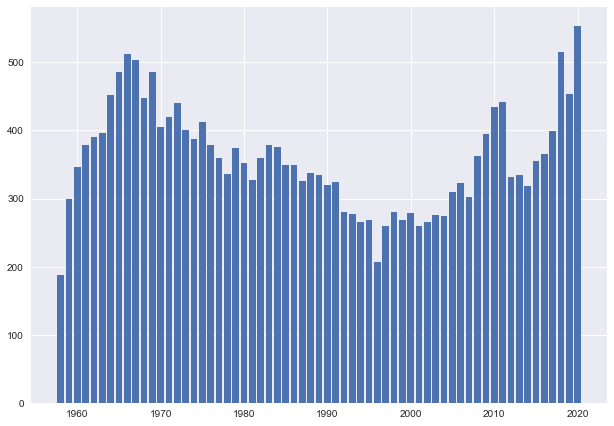

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
yrs = df_hist['Year'].tolist()
cnt = df_hist['SongCount']
ax.bar(yrs,cnt)
plt.savefig("histogram of song count"+".png", bbox_inches='tight')
plt.show()

In [15]:
# Calculating lexical richness
from lexicalrichness import LexicalRichness
# MTLD
lexical_mtld = []
myText = df['Lyrics'].values.tolist()
for text in range(0,len(myText)):
    lex = LexicalRichness(myText[text])
    lexical_mtld.append(lex.mtld(threshold=0.72))
len(lexical_mtld)

22600

In [16]:
df['MTLD'] = lexical_mtld

In [17]:
df_mtld = df.groupby(['year'])['MTLD'].mean().reset_index()

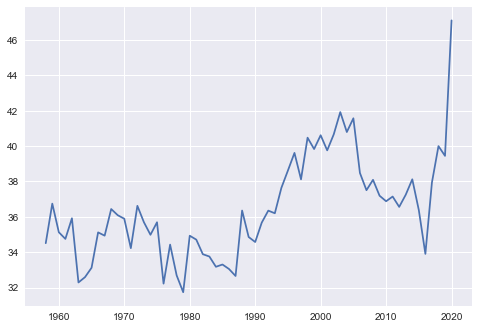

In [18]:
# line 1 points
x1 = df_mtld['year'].to_list()
y1 = df_mtld['MTLD'].to_list()
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")

In [19]:
# Calculating lexical richness
from lexicalrichness import LexicalRichness
# ttr
lexical_ttr = []
myText = df['Lyrics'].values.tolist()
for text in range(0,len(myText)):
    lex = LexicalRichness(myText[text])
    lexical_ttr.append(lex.ttr)
len(lexical_ttr)

22600

In [20]:
df['TTR'] = lexical_ttr

In [21]:
df_ttr = df.groupby(['year'])['TTR'].mean().reset_index()

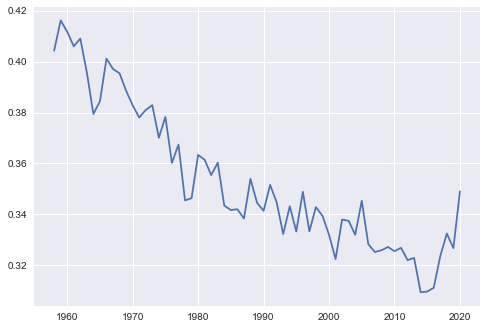

In [22]:
# line 1 points
x1 = df_ttr['year'].to_list()
y1 = df_ttr['TTR'].to_list()
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")
plt.savefig("TTR"+".png", bbox_inches='tight')

In [23]:
# Calculating lexical richness
from lexicalrichness import LexicalRichness
# cttr
lexical_cttr = []
myText = df['Lyrics'].values.tolist()
for text in range(0,len(myText)):
    lex = LexicalRichness(myText[text])
    lexical_cttr.append(lex.cttr)
len(lexical_cttr)

22600

In [24]:
df['CTTR'] = lexical_cttr

In [25]:
df_cttr = df.groupby(['year'])['CTTR'].mean().reset_index()

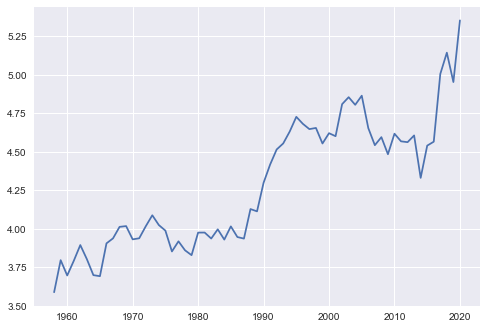

In [26]:
# line 1 points
x1 = df_cttr['year'].to_list()
y1 = df_cttr['CTTR'].to_list()
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")

In [27]:
# Vader sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#testing if it can handle negation
sid = SentimentIntensityAnalyzer()
sentiment = sid.polarity_scores("I have hope, but I do not like summer")
sentiment

{'neg': 0.277, 'neu': 0.52, 'pos': 0.203, 'compound': -0.1815}

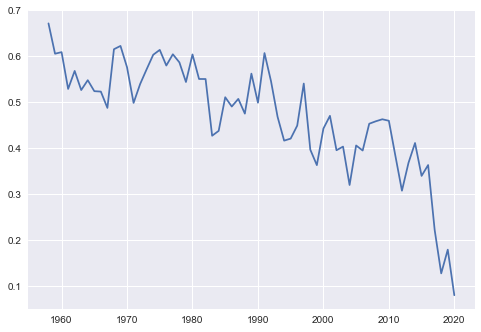

In [28]:
# Compound score of Vader sentiment analysis

sentiments = []
myText = df['Lyrics'].values.tolist()
for text in myText:
    sentiments.append(sid.polarity_scores(text))
    
coms = []
for i in range(0,len(sentiments)):
    coms.append(sentiments[i]['compound'])

df['sentimentScore'] = coms
df_sentiment = df.groupby(['year'])['sentimentScore'].mean().reset_index()

# line 1 points
x1 = df_sentiment['year'].to_list()
y1 = df_sentiment['sentimentScore'].to_list()
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")
plt.savefig("Sentiment trend"+".png", bbox_inches='tight')


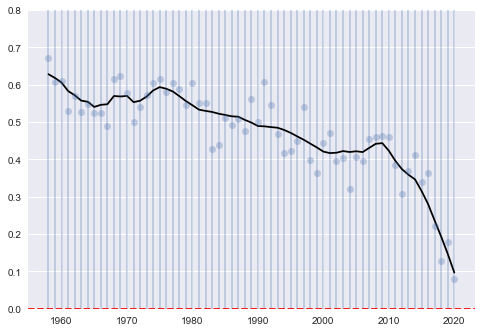

In [29]:
# Using supersmoother
t = df_sentiment['year'].to_list()
y = df_sentiment['sentimentScore'].to_list()
dy = t

# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_sentiment['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(0, 0.8)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Sentiment trend smoothed"+".png", bbox_inches='tight')

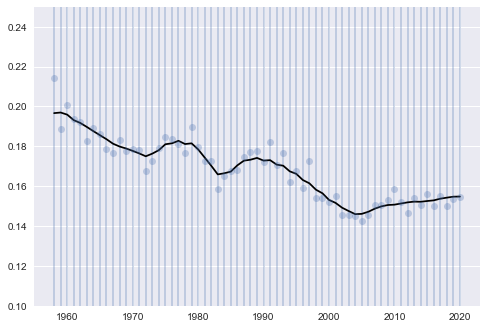

In [30]:
# Positive sentiment analysis
pos = []
for i in range(0,len(sentiments)):
    pos.append(sentiments[i]['pos'])

df['sentimentScore_pos'] = pos
df_sentiment_pos = df.groupby(['year'])['sentimentScore_pos'].mean().reset_index()

# Using supersmoother
t = df_sentiment_pos['year'].to_list()
y = df_sentiment_pos['sentimentScore_pos'].to_list()
dy = t

# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_sentiment_pos['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(0.1, 0.25)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Sentiment positive smoothed"+".png", bbox_inches='tight')

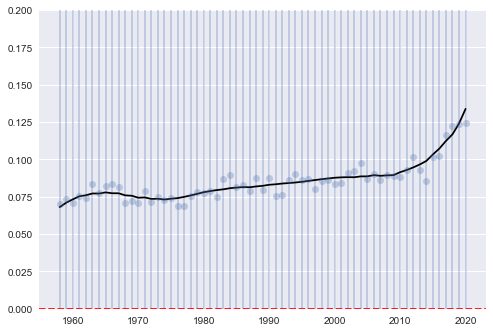

In [31]:
# Negative sentiment analysis
neg = []
for i in range(0,len(sentiments)):
    neg.append(sentiments[i]['neg'])

df['sentimentScore_neg'] = neg
df_sentiment_neg = df.groupby(['year'])['sentimentScore_neg'].mean().reset_index()

# Using supersmoother
t = df_sentiment_neg['year'].to_list()
y = df_sentiment_neg['sentimentScore_neg'].to_list()
dy = t

# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_sentiment_neg['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(0, 0.20)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Sentiment negative smoothed"+".png", bbox_inches='tight')

In [32]:
df_sentiment_pos['mean'] = df_sentiment_pos['sentimentScore_pos'].mean()
df_sentiment_pos['std'] = df_sentiment_pos['sentimentScore_pos'].std()
df_sentiment_pos['z-score_pos'] = (df_sentiment_pos['sentimentScore_pos']-df_sentiment_pos['mean'])/df_sentiment_pos['std']

In [33]:
df_sentiment_neg['mean'] = df_sentiment_neg['sentimentScore_neg'].mean()
df_sentiment_neg['std'] = df_sentiment_neg['sentimentScore_neg'].std()
df_sentiment_neg['z-score_neg'] = (df_sentiment_neg['sentimentScore_neg']-df_sentiment_neg['mean'])/df_sentiment_neg['std']

In [34]:
df_sentiment_score = df_sentiment_pos.merge(df_sentiment_neg, on='year')

In [35]:
df_sentiment_score['difference'] = df_sentiment_score['z-score_pos']-df_sentiment_score['z-score_neg']

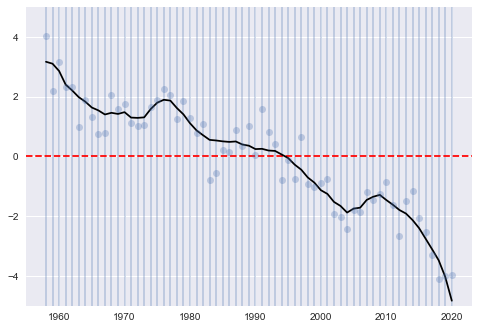

In [36]:
# Using supersmoother
t = df_sentiment_score['year'].to_list()
y = df_sentiment_score['difference'].to_list()
dy = t

# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_sentiment_score['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(-5, 5)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Difference between z-scores of positive and negative sentiments"+".png", bbox_inches='tight')

In [37]:
# Analysing the emotion words [Mood words]
from emotion import*

In [38]:
# Handlling negation and calculating the revised mood score 
#the following five cells handle negation. We will mark them with "handling negation"


In [39]:
#Handling Negation
# swapping the scores of joy and sadness | Input the dictionary
def emo_swap(dic):
    try:
        dic['joy'], dic['sadness'] = dic['sadness'], dic['joy']
    except KeyError:
        try:
            dic['joy'] = dic.pop('sadness')
        except:
            dic['sadness'] = dic.pop('joy')
    return dic

In [40]:
# Handling Negation
# This function adds the negated emotion score with the rest of the score
# input a and b are both dictionaries, a being negation only and b from without negation
def emo_add(a,b):
    if 'joy' in a.keys() and 'joy' in b.keys():
        b['joy']=b['joy']+a['joy']
    elif 'sadness' in a.keys() and 'sadness'in b.keys():
        b['sadness'] = b['sadness']+a['sadness']
    elif 'joy' in a.keys() and 'joy' not in b.keys():
        b['joy'] = a['joy']
    elif 'sadness' in a.keys() and 'sadness' not in b.keys():
        b['sadness'] = a['sadness']
    else:    
        pass
    return b

In [41]:
# Handling Negation
# Calculating emotional scores for the negated part of each song
emo_words_only_neg = []

myText = df['only_negations'].values.tolist()
for text in myText:
    emo_words_only_neg.append(Emo(text).weighted_emotion_scores)

emo_words_neg_swapped = []
for text in emo_words_only_neg:
    try:
        emo_words_neg_swapped.append(emo_swap(text))
    except:
        emo_words_neg_swapped.append("N/A")

len(emo_words_neg_swapped)

22600

In [42]:
# Handling Negation
# Calculating emotional scores for the non-negated part of each song
emo_words_without_neg = []

myText = df['without_negations'].values.tolist()
for text in myText:
    emo_words_without_neg.append(Emo(text).weighted_emotion_scores)
len(emo_words_without_neg)


22600

In [43]:
# Handling Negation
# Finally aggregating both the negated and non-negated parts to calculate the  revised mood score
negated = emo_words_neg_swapped
non_negated = emo_words_without_neg
emo_words = []
for i in range(0,len(non_negated)):
    try:
        emo_words.append(emo_add(negated[i],non_negated[i]))
    except AttributeError:
        emo_words.append(non_negated[i])
len(emo_words)

22600

In [44]:
#Calculating emotional scores for each song
#emo_words = []
#myText = df['all_words'].values.tolist()
#for text in myText:
#    emo_words.append(Emo(text).weighted_emotion_scores)    
#len(emo_words)

In [45]:
emo_words[1]

{'joy': 10.606,
 'anger': 2.064,
 'sadness': 3.2780000000000005,
 'trust': 0.6559999999999999,
 'anticipation': 0.523}

In [46]:
df['emo_words'] = emo_words

In [47]:
#Calculating emotional scores for each song
emo_count = []

myText = df['all_words'].values.tolist()
for text in myText:
    emo_count.append(Emo(text).raw_emotion_scores)
    
len(emo_count)

22600

In [48]:
emoWordCount = []
for i in range(len(emo_count)):
    emoWordCount.append(sum(emo_count[i].values()))
    
df['emoWordCount'] = emoWordCount

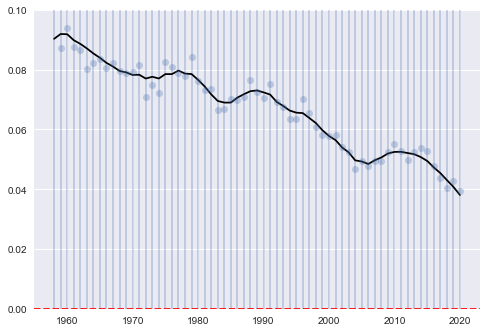

In [49]:
# Emotion trend for Joy
joy = []

myText = df['emo_words']
for text in myText:
    try:
        joy.append(text['joy'])
    except:
        joy.append(0)
    
df['joy'] = joy
df['joy_normalized'] = df['joy']/df['allWordCount']

df_mood_score_joy = df.groupby(['year'])['joy_normalized'].mean().reset_index()

# Using supersmoother
t = df_mood_score_joy['year'].to_list()
y = df_mood_score_joy['joy_normalized'].to_list()
dy = t

# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_mood_score_joy['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(0, 0.1)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Trend joy - smoothed-negation-handled-score solved"+".png", bbox_inches='tight')

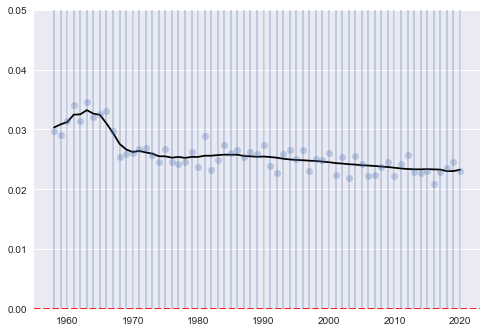

In [50]:
#Emotion trend for sadness

sadness = []

myText = df['emo_words']
for text in myText:
    try:
        sadness.append(text['sadness'])
    except:
        sadness.append(0)
df['sadness'] = sadness  
df['sadness_normalized'] = df['sadness']/df['allWordCount']
df_mood_score_sadness = df.groupby(['year'])['sadness_normalized'].mean().reset_index()
df_mood_score_sadness
# Using supersmoother
t = df_mood_score_sadness['year'].to_list()
y = df_mood_score_sadness['sadness_normalized'].to_list()
dy = t

# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_mood_score_sadness['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(0, 0.05)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Trend sadness - smoothed-negation-handled-score solved"+".png", bbox_inches='tight')

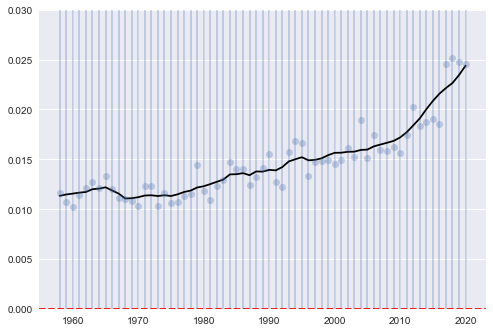

In [51]:
#Emotion trend for anger

anger = []

myText = df['emo_words']
for text in myText:
    try:
        anger.append(text['anger'])
    except:
        anger.append(0)
    
df['anger'] = anger
df['anger_normalized'] = df['anger']/df['allWordCount']
df_mood_score_anger = df.groupby(['year'])['anger_normalized'].mean().reset_index()

# Using supersmoother
t = df_mood_score_anger['year'].to_list()
y = df_mood_score_anger['anger_normalized'].to_list()
dy = t
# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_mood_score_anger['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(0, 0.03)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Trend anger - smoothed-negation-handled-score solved"+".png", bbox_inches='tight')

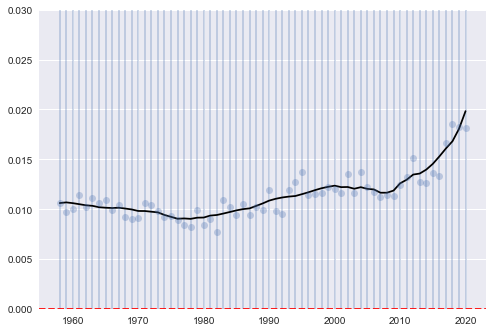

In [52]:
#Emotion trend for disgust

disgust = []

myText = df['emo_words']
for text in myText:
    try:
        disgust.append(text['disgust'])
    except:
        disgust.append(0)
    
df['disgust'] = disgust
df['disgust_normalized'] = df['disgust']/df['allWordCount']
df_mood_score_disgust = df.groupby(['year'])['disgust_normalized'].mean().reset_index()

# Using supersmoother
t = df_mood_score_disgust['year'].to_list()
y = df_mood_score_disgust['disgust_normalized'].to_list()
dy = t
# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_mood_score_disgust['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(0, 0.03)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Trend disgust - smoothed-negation-handled-score solved"+".png", bbox_inches='tight')

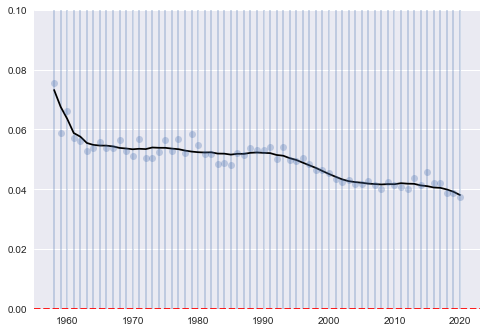

In [53]:
#Emotion trend for trust
trust = []

myText = df['emo_words']
for text in myText:
    try:
        trust.append(text['trust'])
    except:
        trust.append(0)
    
df['trust'] = trust
df['trust_normalized'] = df['trust']/df['allWordCount']
df_mood_score_trust = df.groupby(['year'])['trust_normalized'].mean().reset_index()

# Using supersmoother
t = df_mood_score_trust['year'].to_list()
y = df_mood_score_trust['trust_normalized'].to_list()
dy = t
# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_mood_score_trust['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(0, 0.1)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Trend trust - smoothed-negation-handled-score solved"+".png", bbox_inches='tight')

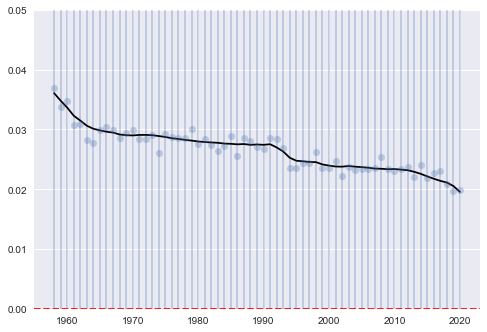

In [54]:
#Emotion trend for anticipation
anticipation = []

myText = df['emo_words']
for text in myText:
    try:
        anticipation.append(text['anticipation'])
    except:
        anticipation.append(0)
    
df['anticipation'] = anticipation
df['anticipation_normalized'] = df['anticipation']/df['allWordCount']
df_mood_score_anticipation = df.groupby(['year'])['anticipation_normalized'].mean().reset_index()

# Using supersmoother
t = df_mood_score_anticipation['year'].to_list()
y = df_mood_score_anticipation['anticipation_normalized'].to_list()
dy = t
# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_mood_score_anticipation['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(0, 0.05)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Trend anticipation - smoothed-negation-handled-score solved"+".png", bbox_inches='tight')

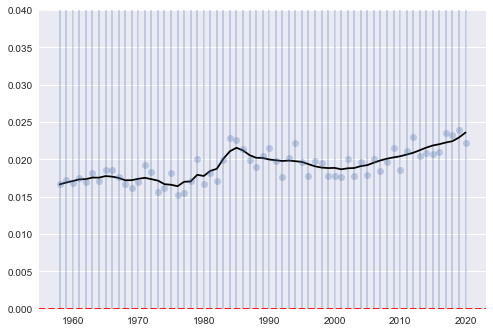

In [55]:
#Emotion trend for fear
fear = []

myText = df['emo_words']
for text in myText:
    try:
        fear.append(text['fear'])
    except:
        fear.append(0)
    
df['fear'] = fear
df['fear_normalized'] = df['fear']/df['allWordCount']
df_mood_score_fear = df.groupby(['year'])['fear_normalized'].mean().reset_index()

# Using supersmoother
t = df_mood_score_fear['year'].to_list()
y = df_mood_score_fear['fear_normalized'].to_list()
dy = t
# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_mood_score_fear['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(0, 0.04)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Trend fear - smoothed-negation-handled-score solved"+".png", bbox_inches='tight')

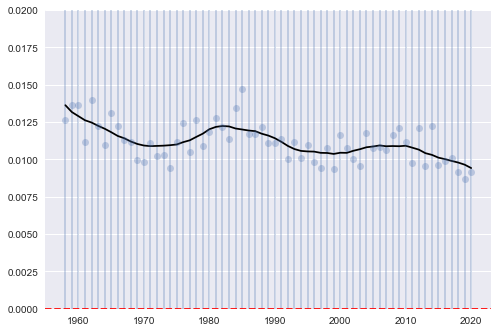

In [56]:
#Emotion trend for surprise
surprise = []

myText = df['emo_words']
for text in myText:
    try:
        surprise.append(text['surprise'])
    except:
        surprise.append(0)
    
df['surprise'] = surprise
df['surprise_normalized'] = df['surprise']/df['allWordCount']
df_mood_score_surprise = df.groupby(['year'])['surprise_normalized'].mean().reset_index()

# Using supersmoother
t = df_mood_score_surprise['year'].to_list()
y = df_mood_score_surprise['surprise_normalized'].to_list()
dy = t
# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_mood_score_surprise['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(0, 0.02)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Trend surprise - smoothed-negation-handled-score solved"+".png", bbox_inches='tight')

In [57]:
# Grouping joy,trust and surprise as "happy" and sadness,anger,disgust,anticipation and fear as "sorrow"
df['emo_score'] = df['joy']+df['sadness']+df['anger']+df['fear']+df['anticipation']+df['disgust']+df['trust']+df['surprise']
df['happy'] = df['joy']+df['trust']+df['surprise']
df['happy_normalized'] = df['happy']/df['allWordCount']
df['sorrow'] = df['sadness']+df['anger']+df['fear']+df['anticipation']+df['disgust']
df['sorrow_normalized'] = df['sorrow']/df['allWordCount']

In [58]:
df['joy_percent'] = df['joy']/df['emo_score']
df['sadness_percent'] = df['sadness']/df['emo_score']
df['anger_percent'] = df['anger']/df['emo_score']
df['fear_percent'] = df['fear']/df['emo_score']
df['disgust_percent'] = df['disgust']/df['emo_score']
df['trust_percent'] = df['trust']/df['emo_score']
df['anticipation_percent'] = df['anticipation']/df['emo_score']
df['surprise_percent'] = df['surprise']/df['emo_score']

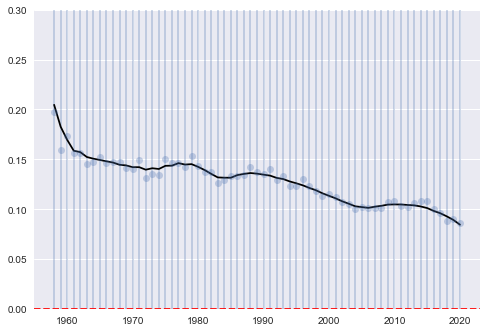

In [59]:
df_mood_score_happy = df.groupby(['year'])['happy_normalized'].mean().reset_index()

# Using supersmoother
t = df_mood_score_happy['year'].to_list()
y = df_mood_score_happy['happy_normalized'].to_list()
dy = t
# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_mood_score_happy['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(0, 0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Trend happy - smoothed-negation-handled-score solved"+".png", bbox_inches='tight')

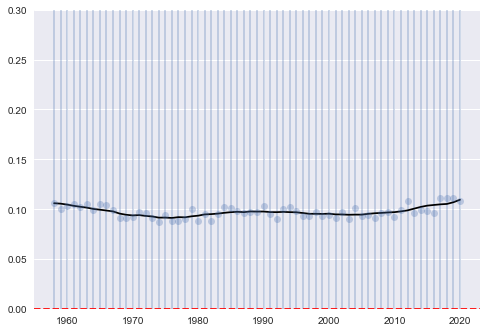

In [60]:
df_mood_score_sorrow = df.groupby(['year'])['sorrow_normalized'].mean().reset_index()

# Using supersmoother
t = df_mood_score_sorrow['year'].to_list()
y = df_mood_score_sorrow['sorrow_normalized'].to_list()
dy = t
# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_mood_score_sorrow['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(0, 0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Trend sorrow - smoothed-negation-handled-score solved"+".png", bbox_inches='tight')

In [61]:
df_mood_score_happy['mean'] = df_mood_score_happy['happy_normalized'].mean()
df_mood_score_happy['std'] = df_mood_score_happy['happy_normalized'].std()
df_mood_score_happy['z-score_happy'] = (df_mood_score_happy['happy_normalized']-df_mood_score_happy['mean'])/df_mood_score_happy['std']
df_mood_score_sorrow['mean'] = df_mood_score_sorrow['sorrow_normalized'].mean()
df_mood_score_sorrow['std'] = df_mood_score_sorrow['sorrow_normalized'].std()
df_mood_score_sorrow['z-score_sorrow'] = (df_mood_score_sorrow['sorrow_normalized']-df_mood_score_sorrow['mean'])/df_mood_score_sorrow['std']

In [62]:
df_mood_score_combined = df_mood_score_happy.merge(df_mood_score_sorrow, on='year')

In [63]:
df_mood_score_combined['difference'] = df_mood_score_happy['z-score_happy']-df_mood_score_sorrow['z-score_sorrow']

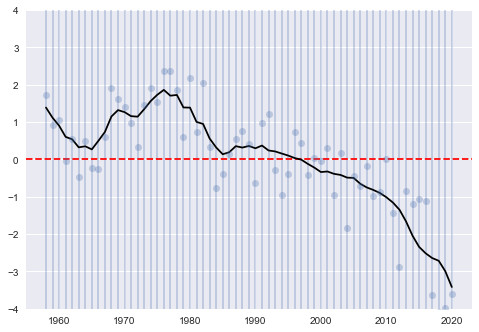

In [65]:
t = df_mood_score_combined['year'].to_list()
y = df_mood_score_combined['difference'].to_list()
dy = t
# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_mood_score_combined['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(-4, 4)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Difference between z-scores of Happy and Sorrow-negation-handled-score solved"+".png", bbox_inches='tight')

In [66]:
# Applying normalizing method on joy and sadness and converting to z-scores

df_mood_score_joy['mean'] = df_mood_score_joy['joy_normalized'].mean()
df_mood_score_joy['std'] = df_mood_score_joy['joy_normalized'].std()
df_mood_score_joy['z-score_joy'] = (df_mood_score_joy['joy_normalized']-df_mood_score_joy['mean'])/df_mood_score_joy['std']

In [67]:
df_mood_score_sadness['mean'] = df_mood_score_sadness['sadness_normalized'].mean()
df_mood_score_sadness['std'] = df_mood_score_sadness['sadness_normalized'].std()
df_mood_score_sadness['z-score_sadness'] = (df_mood_score_sadness['sadness_normalized']-df_mood_score_sadness['mean'])/df_mood_score_sadness['std']

In [68]:
df_mood_score = df_mood_score_joy.merge(df_mood_score_sadness, on='year')

In [70]:
df_mood_score['difference'] = df_mood_score_joy['z-score_joy']-df_mood_score_sadness['z-score_sadness']

In [72]:
# Plotting Using friedman's super smoother from 1984
from supersmoother import SuperSmoother, LinearSmoother

In [73]:
t = df_mood_score['year'].to_list()
y = df_mood_score['difference'].to_list()
dy = t

In [74]:
# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_mood_score['year'].to_list()
yfit = model.predict(tfit)

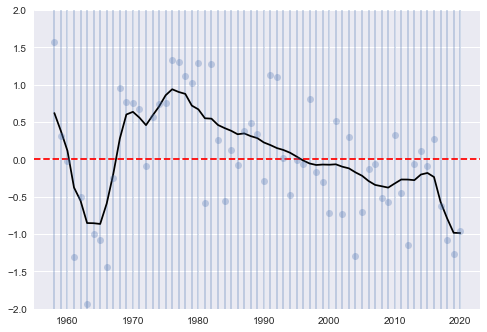

In [75]:
# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(-2, 2)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k');
plt.savefig("Difference between z-scores of Joy and Sadness-negation-handled-score solved"+".png", bbox_inches='tight')

In [76]:
df_mood_score.to_csv('mood_score_negation_handled_score_solved.csv',index=False)

In [77]:
df['emowords_normalized'] = df['emoWordCount']/df['allWordCount']

In [78]:
df_emo_score = df.groupby(['year'])['emowords_normalized'].mean().reset_index()
df_emo_score

,year,emowords_normalized
0,1958,0.605702
1,1959,0.544393
2,1960,0.579852
3,1961,0.546947
4,1962,0.535503
...,...,...
58,2016,0.448912
59,2017,0.471653
60,2018,0.454213
61,2019,0.452204


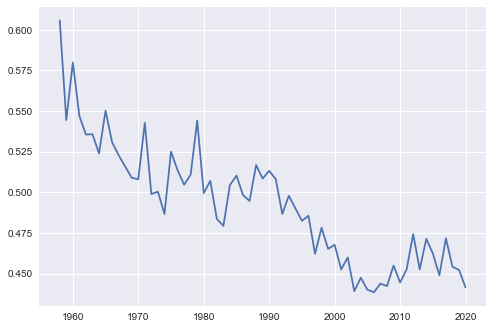

In [79]:
# line 1 points
x1 = df_emo_score['year'].to_list()
y1 = df_emo_score['emowords_normalized'].to_list()
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")

In [80]:
# In this part we will do tf-idf on the lemmatized mood words to see which decade used which words

In [81]:
#Taking all the lexicon words and forming the vocabulary for tf-idf
lexicon = pd.read_csv('emotion_lexicon.txt', delimiter = "\t")

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tf_idf_words(docs,num,index):
    #Taking all the lexicon words and forming the vocabulary for tf-idf
    lexicon = pd.read_csv('emotion_lexicon.txt', delimiter = "\t")
    vocab = list(dict.fromkeys(lexicon['word'].tolist()))

    # settings that you use for count vectorizer will go here
    tfidf_vectorizer=TfidfVectorizer(use_idf=True,vocabulary=vocab)

    # just send in all your docs here
    tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

    # get the first vector out (for the first document)
    first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[index]

    # place tf-idf values in a pandas data frame
    df_tf_idf = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tf_idf"])
    return df_tf_idf.sort_values(by=["tf_idf"],ascending=False).head(num)


In [83]:
df_affect = df.groupby(['decade'])['all_words'].apply(sum).reset_index()
df_affect

,decade,all_words
0,00s,"[produce, scott, storch, juelz, santana, okay,..."
1,10s,"[say, oh, god, see, way, shine, take, hand, de..."
2,20s,"[im, like, water, ship, roll, night, rough, su..."
3,50s,"[girl, change, bobby, sox, stocking, start, tr..."
4,60s,"[still, though, broke, heart, still, though, b..."
5,70s,"[saturday, night, saturday, night, saturday, n..."
6,80s,"[joey, tempest, light, go, see, reason, cry, w..."
7,90s,"[puffy, like, right, yeah, bad, boy, stop, fai..."


In [84]:
# At first converting all the lemmatized words into a string

listToStr = []
mytext = df_affect['all_words'].tolist()
for text in mytext:
      listToStr.append(' '.join([str(elem) for elem in text]))
len(listToStr)

8

In [85]:
# Calculating for each decade
df_tf = pd.DataFrame(columns=['decade','words','score'])
for i in range(0,8):
    a = tf_idf_words(listToStr,50,i)
    a.reset_index(level=0, inplace=True)   
    a.columns=['words','score']
    a.insert(0, 'decade', i)
    df_tf = pd.concat([df_tf, a], ignore_index=True)
    

In [87]:
#Save the data into a csv file
df_tf.to_excel('tf_idf score for mood words.xlsx',index=False)

In [88]:
#Save the data into a csv file
df.to_csv('processed_dataset_all_3(negation handled_score solved).csv',index=False)

In [90]:
#Save the data into a csv file
df.to_excel('processed_dataset_all_4(negation handled_score solved).xlsx',index=False)

In [91]:
df.to_pickle('processed_dataset_all_4(negation handled_score solved).pkl')